"""
Created on Saturday 15 May 2022
"""

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Data/CarPrice_Assignment.csv",sep=",",encoding='latin1')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.shape

(205, 26)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


#### Data Cleaning:

In [7]:
dataset.duplicated(subset= ['car_ID']).sum()

0

no duplicate records

In [8]:
dataset = dataset.drop(['car_ID'], axis=1)

In [9]:
dataset.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
dataset.notnull().sum()

symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [11]:
dataset['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

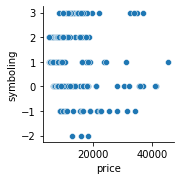

In [12]:
sns.pairplot(y_vars = 'symboling', x_vars ='price', data=dataset)

In [13]:
dataset['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.

In [14]:
dataset['car_company'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])

In [15]:
dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
dataset = dataset.drop(['CarName'], axis=1)

In [17]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
dataset['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

We see some spelling mistakes in the data

In [19]:
dataset['car_company'].replace('toyouta', 'toyota', inplace=True)
dataset['car_company'].replace('Nissan', 'nissan', inplace=True)
dataset['car_company'].replace('maxda', 'mazda', inplace=True)
dataset['car_company'].replace('vokswagen', 'volkswagen', inplace=True)
dataset['car_company'].replace('vw', 'volkswagen', inplace=True)
dataset['car_company'].replace('porcshce', 'porsche', inplace=True)

In [20]:
dataset['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [21]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [22]:
dataset['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [23]:
dataset['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [24]:
def number_(x):
  return x.map({'four':4, 'two':2})

dataset['doornumber'] = dataset[['doornumber']].apply(number_)

In [25]:
dataset['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [26]:
dataset['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [27]:
dataset['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [28]:
dataset['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [29]:
dataset['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

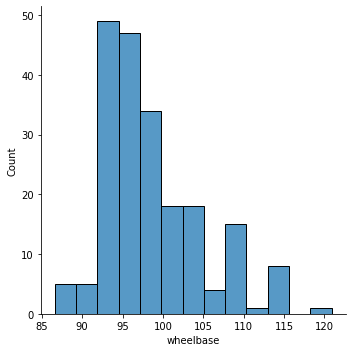

In [30]:
sns.displot(dataset['wheelbase'])
plt.show()

In [31]:
dataset['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

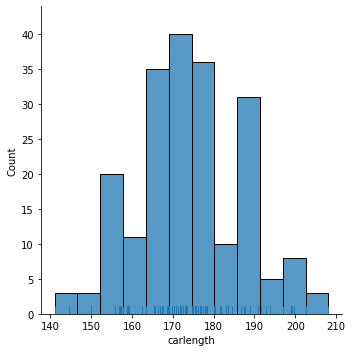

In [32]:
sns.displot(dataset['carlength'], rug=True)
plt.show()

In [33]:
dataset['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [34]:
dataset['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [35]:
def convert_number(x):
  return x.map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

dataset['cylindernumber'] = dataset[['cylindernumber']].apply(convert_number)

In [36]:
dataset['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [37]:
dataset['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

### Data Visualization

In [38]:
cars_numeric = dataset.select_dtypes(include=['int64', 'float64'])
cars_numeric

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [39]:
# plt.figure(figsize=(40,40))
# sns.pairplot(cars_numeric)
# plt.show()

In [40]:
# plt.figure(figsize=(30,30))
# sns.heatmap(dataset.corr(), annot =True, cmap= 'YlGnBu')
# plt.show()

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

* Price is negatively correlated to symboling, citympg and highwaympg.

* This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

* There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [41]:
categorical_cols = dataset.select_dtypes(include = ['object'])
categorical_cols

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


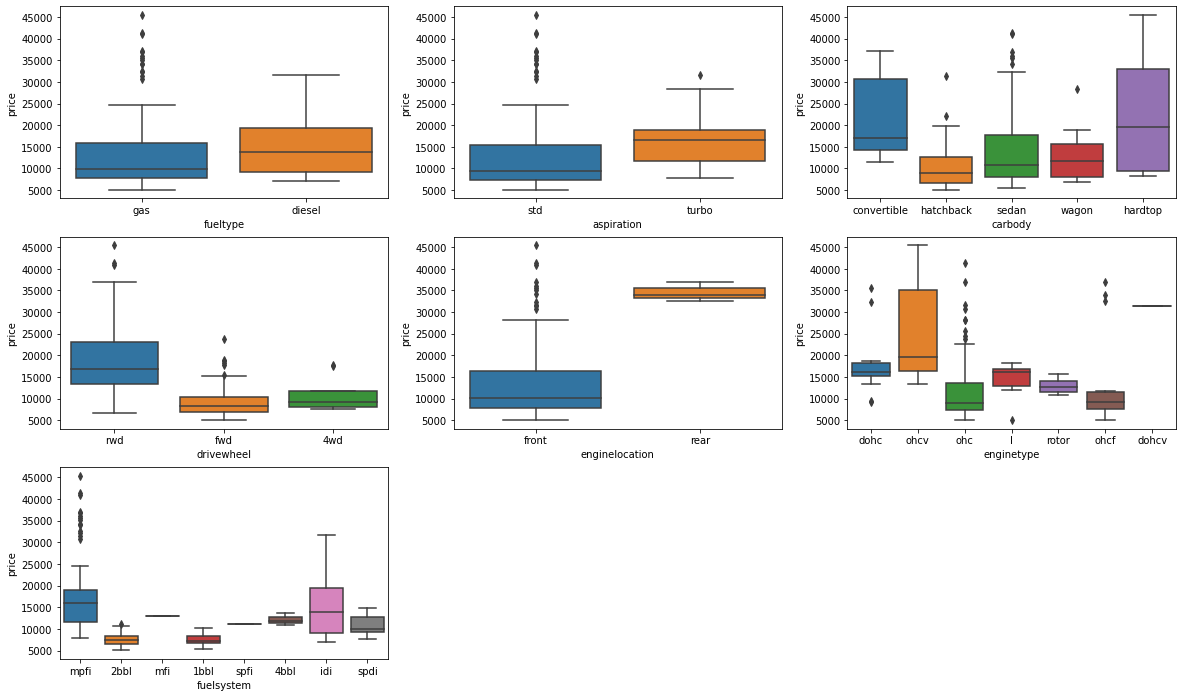

In [42]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y='price', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y='price', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y='price', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y='price', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y='price', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y='price', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y='price', data = dataset)

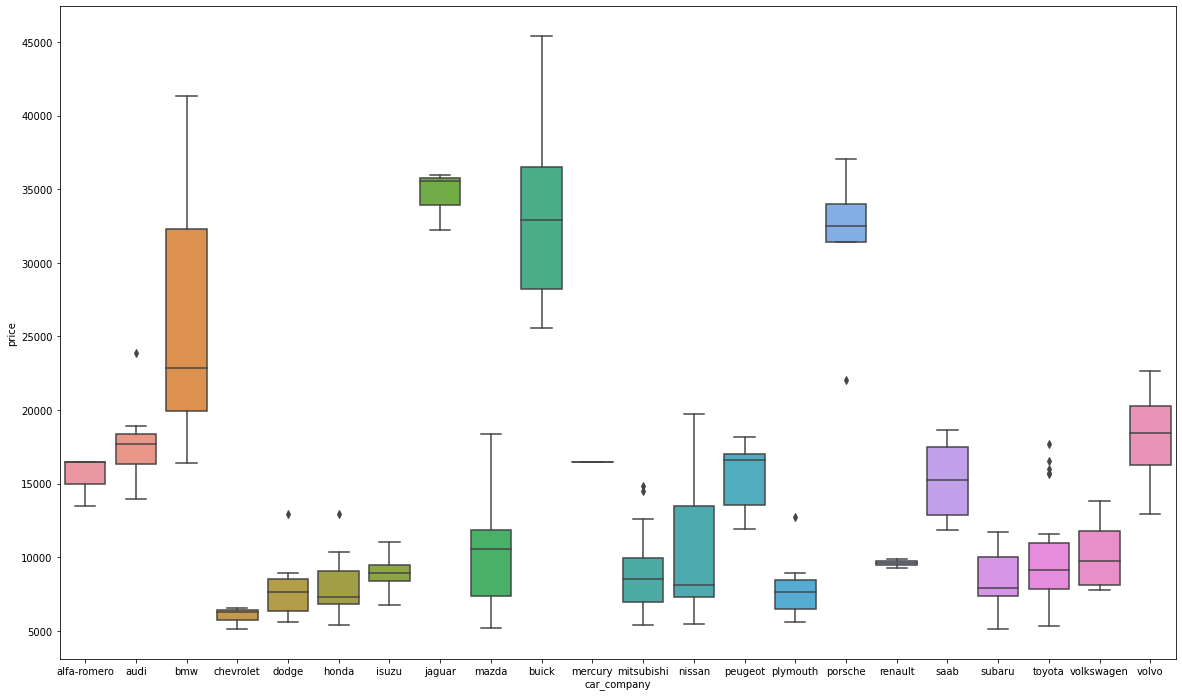

In [43]:
plt.figure(figsize=(20,12))
sns.boxplot(x = 'car_company', y='price', data=dataset)

### Data preparation

In [44]:
#creating dummies
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
car_df  = pd.concat([dataset, cars_dummies], axis =1)

In [46]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [47]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

In [48]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
df_train.shape

(143, 60)

In [50]:
df_test.shape

(62, 60)

In [51]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [52]:

col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [53]:
scaler = StandardScaler()

In [54]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [55]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building:

In [56]:
y_train = df_train.pop('price')
X_train = df_train

In [77]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [78]:
print(lm.coef_)
print(lm.intercept_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01  2.22044605e-16 -4.00301122e-02
 -5.85575952e-02 -2.22044605e-16 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01  3.33066907e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]
0.9701688083156768


### Model building using RFE

In [81]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False False  True False False False  True False False  True
 False False False False  True False  True  True  True  True False False
  True False  True False  True False  True False  True  True False False
 False False  True  True False  True  True  True False False  True False
  True  True  True  True  True  True False  True  True  True False]
[27 25 14 17  1 12  3 18  1  4 19  1  9 10 23 16  1  2  1  1  1  1 21 24
  1  8  1  6  1 28  1 22  1  1 29 13  5 31  1  1 20  1  1  1 11 15  1 30
  1  1  1  1  1  1  7  1  1  1 26]


In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 27),
 ('doornumber', False, 25),
 ('wheelbase', False, 14),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', False, 3),
 ('cylindernumber', False, 18),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 19),
 ('compressionratio', True, 1),
 ('horsepower', False, 9),
 ('peakrpm', False, 10),
 ('citympg', False, 23),
 ('highwaympg', False, 16),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 2),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 24),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 28),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 22),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', True, 1),
 ('f

In [82]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,carwidth,enginesize,compressionratio,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,...,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_subaru,car_company_toyota,car_company_volkswagen
122,1.0,-0.924500,-0.660242,-0.172569,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
125,1.0,1.114978,0.637806,-0.146125,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
166,1.0,-0.833856,-0.660242,-0.172569,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,-0.788535,0.123485,-0.278345,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,-0.675002,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.44e-61
Time:                        00:38:58   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,car_company_subaru,inf
14,fuelsystem_idi,inf
4,fueltype_gas,inf
9,enginelocation_rear,inf
11,enginetype_ohcf,inf
3,compressionratio,50.28
23,car_company_peugeot,13.60
10,enginetype_l,13.09
7,carbody_sedan,11.22
6,carbody_hatchback,10.98


In [86]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe2 = RFE(lm)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [87]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

In [88]:
# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

In [89]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [90]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.44e-61
Time:                        00:40:30   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Notice that there are a few variables which have an infinite VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. Let's try and build a model with 10 features this time using RFE and see what we get.

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,car_company_subaru,inf
14,fuelsystem_idi,inf
4,fueltype_gas,inf
9,enginelocation_rear,inf
11,enginetype_ohcf,inf
3,compressionratio,50.28
23,car_company_peugeot,13.60
10,enginetype_l,13.09
7,carbody_sedan,11.22
6,carbody_hatchback,10.98


In [93]:
X_train_rfe2.drop('car_company_subaru', axis = 1, inplace = True)

In [94]:
# Refitting with 9 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.44e-61
Time:                        00:41:32   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,fuelsystem_idi,inf
4,fueltype_gas,inf
3,compressionratio,50.28
23,car_company_peugeot,13.60
10,enginetype_l,13.09
7,carbody_sedan,11.22
6,carbody_hatchback,10.98
8,carbody_wagon,6.09
1,carwidth,5.14
12,enginetype_rotor,4.56


In [96]:
X_train_rfe2.drop('enginetype_ohcf', axis = 1, inplace = True)

In [97]:
# Refitting with 8 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     64.41
Date:                Mon, 16 May 2022   Prob (F-statistic):           5.57e-57
Time:                        00:42:05   Log-Likelihood:                -7.2255
No. Observations:                 143   AIC:                             68.45
Df Residuals:                     116   BIC:                             148.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fueltype_gas,inf
13,fuelsystem_idi,inf
3,compressionratio,49.59
22,car_company_peugeot,13.54
10,enginetype_l,13.07
7,carbody_sedan,10.79
6,carbody_hatchback,10.50
8,carbody_wagon,5.71
1,carwidth,5.10
11,enginetype_rotor,4.55


In [99]:
X_train_rfe2.drop('car_company_peugeot', axis = 1, inplace = True)

In [100]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     60.54
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.44e-55
Time:                        00:42:37   Log-Likelihood:                -14.540
No. Observations:                 143   AIC:                             81.08
Df Residuals:                     117   BIC:                             158.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,fuelsystem_idi,inf
4,fueltype_gas,inf
3,compressionratio,49.23
7,carbody_sedan,10.79
6,carbody_hatchback,10.48
8,carbody_wagon,5.71
1,carwidth,4.86
11,enginetype_rotor,4.55
2,enginesize,4.06
12,fuelsystem_4bbl,3.92


In [102]:
# Refitting with 6 variables
X_train_rfe2.drop('enginetype_l', axis = 1, inplace = True)

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.62e-54
Time:                        00:43:03   Log-Likelihood:                -20.427
No. Observations:                 143   AIC:                             90.85
Df Residuals:                     118   BIC:                             164.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,fuelsystem_idi,inf
4,fueltype_gas,inf
3,compressionratio,44.68
7,carbody_sedan,10.77
6,carbody_hatchback,10.47
8,carbody_wagon,5.68
1,carwidth,4.71
10,enginetype_rotor,4.55
11,fuelsystem_4bbl,3.92
2,enginesize,3.88


In [104]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

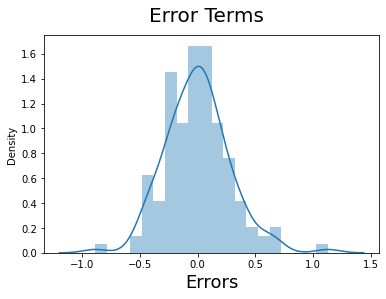

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### Making Prediction 

In [107]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [108]:
col2

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'car_company_audi', 'car_company_bmw',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_honda',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugeot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_subaru', 'car_company_toyota',
       'car_company_volkswagen'],
      dtype='object')

In [109]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [110]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'], axis = 1)

In [111]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   62 non-null     float64
 1   carwidth                62 non-null     float64
 2   enginesize              62 non-null     int64  
 3   compressionratio        62 non-null     float64
 4   fueltype_gas            62 non-null     uint8  
 5   carbody_hardtop         62 non-null     uint8  
 6   carbody_hatchback       62 non-null     uint8  
 7   carbody_sedan           62 non-null     uint8  
 8   carbody_wagon           62 non-null     uint8  
 9   enginelocation_rear     62 non-null     uint8  
 10  enginetype_rotor        62 non-null     uint8  
 11  fuelsystem_4bbl         62 non-null     uint8  
 12  fuelsystem_idi          62 non-null     uint8  
 13  car_company_audi        62 non-null     uint8  
 14  car_company_bmw         62 non-null     u

In [112]:
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

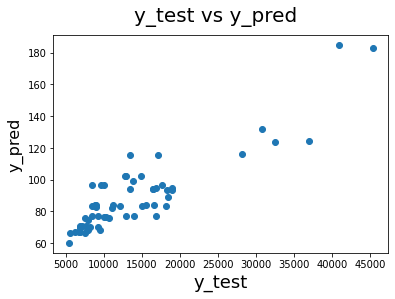

In [113]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [114]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-2.673669081965734

In [115]:
col2 = col2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'])